In [1]:
import math
from simtk import unit
import os
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
from simtk.openmm import app
from openmmforcefields.generators import SystemGenerator
from perses.tests.test_topology_proposal import generate_atp, generate_dipeptide_top_pos_sys
import logging 

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt


RDKit WARNING: [10:08:59] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
# Generate htf for capped THR->ALA in vacuum
pdb = app.PDBFile("../input/thr_vacuum.pdb")

forcefield_files = ['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml']
barostat = None
system_generator = SystemGenerator(forcefields=forcefield_files,
                               barostat=barostat,
                               forcefield_kwargs={'removeCMMotion': False,
                                                    'ewaldErrorTolerance': 1e-4,
                                                    'constraints' : app.HBonds,
                                                    'hydrogenMass' : 4 * unit.amus},
                                periodic_forcefield_kwargs=None,
                                small_molecule_forcefield='gaff-2.11',
                                nonperiodic_forcefield_kwargs = {'nonbondedMethod': app.NoCutoff}, 
                                   molecules=None, 
                                   cache=None)
system = system_generator.create_system(pdb.topology) 
positions = unit.quantity.Quantity(value = np.array([list(atom_pos) for atom_pos in pdb.positions.value_in_unit_system(unit.md_unit_system)]), unit = unit.nanometers)

htf_0 = generate_dipeptide_top_pos_sys(pdb.topology, 
                                         new_res = 'ALA', 
                                         system = system, 
                                         positions = positions,
                                         system_generator = system_generator, 
                                         conduct_htf_prop=True,
                                         repartitioned=True, endstate=0, validate_endstate_energy=False)


INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{4: 4, 7: 9}, {4: 4, 8: 9}, {4: 4, 9: 9}]
INFO:proposal_generator:{4: 4, 7: 9}
INFO:proposal_generator:{4: 4, 8: 9}
INFO:proposal_generator:{4: 4, 9: 9}
INFO:proposal_generator:Returning map that best satisfies matching_criterion
INFO:proposal_generator:Finding best map using matching_criterion name
INFO:proposal_generator:{4: 4, 7: 9}
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 2
INFO:geometry:Atom index proposal order is [15, 14]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_position

making topology proposal
generating geometry engine
making geometry proposal from THR to ALA


INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 98 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -2.8903717578961645
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 2 new atoms
INFO:geometry:	reduced angle potential = 0.4393582538895373.
INFO:geometry:	reduced angle potential = 1.3544740777570032.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 32.60026351468746


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 18.8477483298321
INFO:geometry:final reduced energy 51.44801202515673
INFO:geometry:sum of energies: 51.44801184451956
INFO:geometry:magnitude of difference in the energies: 1.8063716566985022e-07
INFO:geometry:Final logp_proposal: 9.200687374778553


added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 12.85533866180478), ('CustomTorsionForce', 0.2812726676361725), ('CustomBondForce', 5.711137000391147)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 6
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching di

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 6 new atoms
INFO:geometry:	reduced angle potential = 0.9937847427445646.
INFO:geometry:	reduced angle potential = 0.0014854685245420216.
INFO:geometry:	reduced angle potential = 1.4721875889480596.
INFO:geometry:	reduced angle potential = 0.06574611719589983.
INFO:geometry:	reduced angle potential = 0.1309305042075324.
INFO:geometry:	reduced angle potential = 0.4119874609634221.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geo

conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 32.60026351468747


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 39.581556232340176
INFO:geometry:final reduced energy 72.18181819915482
INFO:geometry:sum of energies: 72.18181974702765
INFO:geometry:magnitude of difference in the energies: 1.5478728272455555e-06
INFO:geometry:Final logp_proposal: -359.2028893022663


added energy components: [('CustomBondForce', 1.183228307230623), ('CustomAngleForce', 110.48068313226224), ('CustomTorsionForce', 10.601103430928823), ('CustomBondForce', -82.68345863808149)]


INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 0
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:No MonteCarloBarostat added.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.0), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:relative:Generating new system exceptions dict...
INFO:relative:Handling constraints...
INFO:relative:Handling virtual sites...
INFO:

In [3]:
htf_1 = generate_dipeptide_top_pos_sys(pdb.topology, 
                                         new_res = 'ALA', 
                                         system = system, 
                                         positions = positions,
                                         system_generator = system_generator, 
                                         conduct_htf_prop=True,
                                         repartitioned=True, endstate=1, validate_endstate_energy=False)


INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{4: 4, 7: 9}, {4: 4, 8: 9}, {4: 4, 9: 9}]
INFO:proposal_generator:{4: 4, 7: 9}
INFO:proposal_generator:{4: 4, 8: 9}
INFO:proposal_generator:{4: 4, 9: 9}
INFO:proposal_generator:Returning map that best satisfies matching_criterion
INFO:proposal_generator:Finding best map using matching_criterion name
INFO:proposal_generator:{4: 4, 7: 9}
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 2
INFO:geometry:Atom index proposal order is [15, 14]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_position

making topology proposal
generating geometry engine
making geometry proposal from THR to ALA


INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 98 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -2.8903717578961645
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter


conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 2 new atoms
INFO:geometry:	reduced angle potential = 0.002830995799624884.
INFO:geometry:	reduced angle potential = 0.00030557280376312896.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 32.60026351468746


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 23.924916561434394
INFO:geometry:final reduced energy 56.52518019402572
INFO:geometry:sum of energies: 56.525180076121856
INFO:geometry:magnitude of difference in the energies: 1.1790386622578808e-07
INFO:geometry:Final logp_proposal: 10.635636134058482


added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 18.014179302065138), ('CustomTorsionForce', 0.2501790164895362), ('CustomBondForce', 5.660558242879723)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 6
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching di

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions
INFO:geometry:There are 6 new atoms
INFO:geometry:	reduced angle potential = 0.9937847427445646.


conducting subsequent work with the following platform: CUDA


INFO:geometry:	reduced angle potential = 0.0014854685245420216.
INFO:geometry:	reduced angle potential = 0.06574611719589983.
INFO:geometry:	reduced angle potential = 0.4119874609634221.
INFO:geometry:	reduced angle potential = 1.4721875889480596.
INFO:geometry:	reduced angle potential = 0.1309305042075324.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 32.60026351468747


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 39.581556232340176
INFO:geometry:final reduced energy 72.18181819915482
INFO:geometry:sum of energies: 72.18181974702765
INFO:geometry:magnitude of difference in the energies: 1.5478728272455555e-06
INFO:geometry:Final logp_proposal: -359.48838570342883


added energy components: [('CustomBondForce', 1.183228307230623), ('CustomAngleForce', 110.48068313226224), ('CustomTorsionForce', 10.601103430928823), ('CustomBondForce', -82.68345863808149)]


INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 0
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:No MonteCarloBarostat added.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.0), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:relative:Generating new system exceptions dict...
INFO:relative:Handling constraints...
INFO:relative:Handling virtual sites...
INFO:

In [4]:
np.linspace(-np.pi, np.pi, endpoint=True, num=10)

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

In [5]:
def plot_torsion_energy(torsion_force, hybrid_indices, atom_indices, topology, positions):
    # hybrid indices : for use in querying periodic torsion force for torsion parameters (of hybrid system)
    # atom_indices : for use in computing dihedrals given the old or new topology

    periodicities = []
    phase_offsets = []
    ks = []
    for i in range(torsion_force.getNumTorsions()):
        particle1, particle2, particle3, particle4, periodicity, phase, k = torsion_force.getTorsionParameters(i)
        if sorted([particle1, particle2, particle3, particle4]) == sorted(hybrid_indices):
            periodicities.append(periodicity)
            phase_offsets.append(phase)
            ks.append(k)
    print(f"periodicities: {periodicities}")
    print(f"phase offsets: {phase_offsets}")
    print(f"ks: {ks}")
    
    # Get angles
    angles = np.linspace(-np.pi, np.pi, endpoint=True, num=10)
    print(f"angles: {angles}")
    
    # Compute energies
    # (http://docs.openmm.org/latest/userguide/theory.html#periodictorsionforce)
    def f(periodicity, angle, phase_offset, k):
        return k*(1 + np.cos(periodicity*angle - phase_offset))
    
    energies = []
    for angle in angles:
        terms = []
        for periodicity, phase, k in zip(periodicities, phase_offsets, ks):
            terms.append(f(periodicity, angle, phase.value_in_unit_system(unit.md_unit_system), k.value_in_unit_system(unit.md_unit_system)))
        energies.append(np.sum(terms))
    print(f"energies: {energies}")
    
    # Plot the torsion energies in the order in which they appear in the torsion force
    plt.plot(angles, energies)
    plt.xlabel('radians')
    plt.ylabel('Torsion energy')
    plt.ylim(0, 10)
    plt.show()

# THR-ALA lambda = 0

### THR

In [6]:
htf_0.old_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25}

In [7]:
torsion_force = htf_0.hybrid_system.getForce(2)
for i in range(torsion_force.getNumTorsions()):
    print(torsion_force.getTorsionParameters(i))

[0, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[0, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[1, 4, 6, 7, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[1, 4, 6, 8, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[2, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[2, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[3, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[3, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[4, 6, 8, 10, 3, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[4, 6, 8, 10, 2, Quantity

periodicities: [4, 3, 2, 1]
phase offsets: [Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.39748, unit=kilojoule/mole), Quantity(value=1.31796, unit=kilojoule/mole), Quantity(value=0.025104, unit=kilojoule/mole), Quantity(value=2.8200160000000003, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.845168, 2.6901326546355606, 5.010746662307136, 4.4413160000000005, 7.957740683057306, 7.957740683057306, 4.441316000000001, 5.010746662307136, 2.6901326546355606, 0.845168]


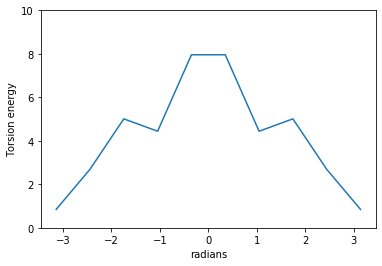

In [8]:
torsion_force = htf_0.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [18, 10, 8, 6], [18, 10, 8, 6], htf_0._topology_proposal.old_topology, np.array(htf_0.old_positions(htf_0.hybrid_positions)))


### ALA

In [9]:
for atom in htf_0._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (H1) of chain 0 residue 0 (ACE)>
<Atom 1 (CH3) of chain 0 residue 0 (ACE)>
<Atom 2 (H2) of chain 0 residue 0 (ACE)>
<Atom 3 (H3) of chain 0 residue 0 (ACE)>
<Atom 4 (C) of chain 0 residue 0 (ACE)>
<Atom 5 (O) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (ALA)>
<Atom 7 (H) of chain 0 residue 1 (ALA)>
<Atom 8 (CA) of chain 0 residue 1 (ALA)>
<Atom 9 (HA) of chain 0 residue 1 (ALA)>
<Atom 10 (CB) of chain 0 residue 1 (ALA)>
<Atom 11 (C) of chain 0 residue 1 (ALA)>
<Atom 12 (O) of chain 0 residue 1 (ALA)>
<Atom 13 (HB1) of chain 0 residue 1 (ALA)>
<Atom 14 (HB2) of chain 0 residue 1 (ALA)>
<Atom 15 (HB3) of chain 0 residue 1 (ALA)>
<Atom 16 (N) of chain 0 residue 2 (NME)>
<Atom 17 (H) of chain 0 residue 2 (NME)>
<Atom 18 (C) of chain 0 residue 2 (NME)>
<Atom 19 (H1) of chain 0 residue 2 (NME)>
<Atom 20 (H2) of chain 0 residue 2 (NME)>
<Atom 21 (H3) of chain 0 residue 2 (NME)>


In [10]:
htf_0.new_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 16: 20,
 17: 21,
 18: 22,
 19: 23,
 20: 24,
 21: 25,
 14: 26,
 15: 27}

periodicities: [3]
phase offsets: [Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.6508444444444444, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.0, 0.976266666666667, 0.9762666666666666, 0.0, 0.9762666666666666, 0.9762666666666666, 0.0, 0.9762666666666663, 0.976266666666667, 0.0]


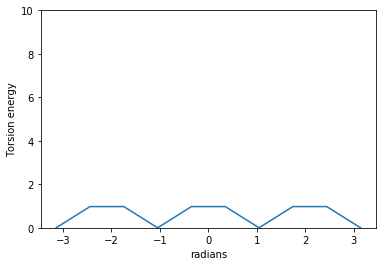

In [11]:
torsion_force = htf_0.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [13, 10, 8, 6], [13, 10, 8, 6], htf_0._topology_proposal.new_topology, np.array(htf_0.new_positions(htf_0.hybrid_positions)))

# THR->ALA lambda = 1

### THR

In [12]:
htf_1.old_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25}

periodicities: [4, 3, 2, 1]
phase offsets: [Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.39748, unit=kilojoule/mole), Quantity(value=1.31796, unit=kilojoule/mole), Quantity(value=0.025104, unit=kilojoule/mole), Quantity(value=2.8200160000000003, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.845168, 2.6901326546355606, 5.010746662307136, 4.4413160000000005, 7.957740683057306, 7.957740683057306, 4.441316000000001, 5.010746662307136, 2.6901326546355606, 0.845168]


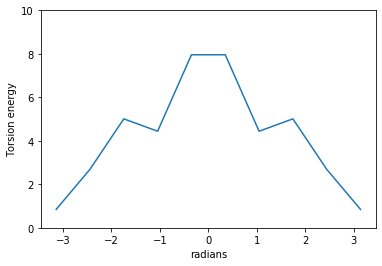

In [13]:
torsion_force = htf_1.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [18, 10, 8, 6], [18, 10, 8, 6], htf_1._topology_proposal.old_topology, np.array(htf_1.old_positions(htf_1.hybrid_positions)))

### ALA

In [14]:
for atom in htf_1._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (H1) of chain 0 residue 0 (ACE)>
<Atom 1 (CH3) of chain 0 residue 0 (ACE)>
<Atom 2 (H2) of chain 0 residue 0 (ACE)>
<Atom 3 (H3) of chain 0 residue 0 (ACE)>
<Atom 4 (C) of chain 0 residue 0 (ACE)>
<Atom 5 (O) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (ALA)>
<Atom 7 (H) of chain 0 residue 1 (ALA)>
<Atom 8 (CA) of chain 0 residue 1 (ALA)>
<Atom 9 (HA) of chain 0 residue 1 (ALA)>
<Atom 10 (CB) of chain 0 residue 1 (ALA)>
<Atom 11 (C) of chain 0 residue 1 (ALA)>
<Atom 12 (O) of chain 0 residue 1 (ALA)>
<Atom 13 (HB1) of chain 0 residue 1 (ALA)>
<Atom 14 (HB2) of chain 0 residue 1 (ALA)>
<Atom 15 (HB3) of chain 0 residue 1 (ALA)>
<Atom 16 (N) of chain 0 residue 2 (NME)>
<Atom 17 (H) of chain 0 residue 2 (NME)>
<Atom 18 (C) of chain 0 residue 2 (NME)>
<Atom 19 (H1) of chain 0 residue 2 (NME)>
<Atom 20 (H2) of chain 0 residue 2 (NME)>
<Atom 21 (H3) of chain 0 residue 2 (NME)>


In [15]:
htf_1.new_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 16: 20,
 17: 21,
 18: 22,
 19: 23,
 20: 24,
 21: 25,
 14: 26,
 15: 27}

In [16]:
torsion_force = htf_1.hybrid_system.getForce(2)
for i in range(torsion_force.getNumTorsions()):
    print(torsion_force.getTorsionParameters(i))

[0, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[0, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[1, 4, 6, 7, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[1, 4, 6, 8, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[2, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[2, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[3, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[3, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[4, 6, 8, 10, 3, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[4, 6, 8, 10, 2, Quantity

periodicities: [3]
phase offsets: [Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.6508444444444444, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.0, 0.976266666666667, 0.9762666666666666, 0.0, 0.9762666666666666, 0.9762666666666666, 0.0, 0.9762666666666663, 0.976266666666667, 0.0]


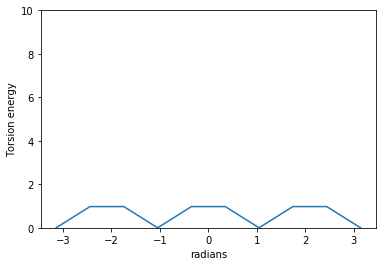

In [17]:
torsion_force = htf_1.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [13, 10, 8, 6], [13, 10, 8, 6], htf_1._topology_proposal.new_topology, np.array(htf_1.new_positions(htf_1.hybrid_positions)))

# ALA->THR lambda=0

In [18]:
# Generate htf for capped ALA->THR in vacuum
atp, sys_gen = generate_atp()

# At alanine endstate
htf_0 = generate_dipeptide_top_pos_sys(atp.topology, 
                                         new_res = 'THR', 
                                         system = atp.system, 
                                         positions = atp.positions,
                                         system_generator = sys_gen, 
                                         conduct_htf_prop=True,
                                         repartitioned=True, endstate=0, validate_endstate_energy=False)

INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{4: 4, 9: 9}]
INFO:proposal_generator:{4: 4, 9: 9}
INFO:proposal_generator:Only one map so returning that one
INFO:proposal_generator:{4: 4, 9: 9}
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...


making topology proposal
generating geometry engine
making geometry proposal from ALA to THR


INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping t

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3244063562834821.
INFO:geometry:	reduced angle potential = 0.4076537174230009.
INFO:geometry:	reduced angle potential = 0.1694172537441297.
INFO:geometry:	reduced angle potential = 0.09034073074986741.
INFO:geometry:	reduced angle potential = 0.37390858496942914.
INFO:geometry:	reduced angle potential = 0.19757798851272032.
INFO:geometry:	reduced angle potential = 0.2950369248635637.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.814048311102034


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -78.73549333265761
INFO:geometry:final reduced energy -61.92144683957432
INFO:geometry:sum of energies: -61.92144502155558
INFO:geometry:magnitude of difference in the energies: 1.8180187453253893e-06
INFO:geometry:Final logp_proposal: 39.139878513802195


added energy components: [('CustomBondForce', 0.3936198870624234), ('CustomAngleForce', 5.245308825242342), ('CustomTorsionForce', 10.649172721491047), ('CustomBondForce', -95.02359476645344)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 3
INFO:geometry:Atom index proposal order is [13, 12, 11]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 9 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 36 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 42 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INF

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 7.390951941228323e-11.
INFO:geometry:	reduced angle potential = 3.205828647416432e-13.
INFO:geometry:	reduced angle potential = 1.2915573155343707e-10.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.814048311102034


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 8.81651499884088
INFO:geometry:final reduced energy 25.630563767506082
INFO:geometry:sum of energies: 25.630563309942914
INFO:geometry:magnitude of difference in the energies: 4.575631677994352e-07
INFO:geometry:Final logp_proposal: 14.67597728802957


added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 0.0001781006016944201), ('CustomTorsionForce', 0.0043368105421684325), ('CustomBondForce', 8.812000087697017)]


INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 0
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:No MonteCarloBarostat added.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.0), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:relative:Generating new system exceptions dict...
INFO:relative:Handling constraints...
INFO:relative:Handling virtual sites...
INFO:

In [19]:
# At threonine endstate
htf_1 = generate_dipeptide_top_pos_sys(atp.topology, 
                                         new_res = 'THR', 
                                         system = atp.system, 
                                         positions = atp.positions,
                                         system_generator = sys_gen, 
                                         conduct_htf_prop=True,
                                         repartitioned=True, endstate=1, validate_endstate_energy=False)

INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{4: 4, 9: 9}]
INFO:proposal_generator:{4: 4, 9: 9}
INFO:proposal_generator:Only one map so returning that one
INFO:proposal_generator:{4: 4, 9: 9}
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 11 bonds in referenc

making topology proposal
generating geometry engine
making geometry proposal from ALA to THR


INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contex

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08850239291350784.
INFO:geometry:	reduced angle potential = 0.5170342989313403.
INFO:geometry:	reduced angle potential = 0.5147633685245022.
INFO:geometry:	reduced angle potential = 0.010583022083134604.
INFO:geometry:	reduced angle potential = 0.00028929749659679823.
INFO:geometry:	reduced angle potential = 0.09162056414135346.
INFO:geometry:	reduced angle potential = 0.02618764187845028.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 11 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.814048311102034


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -55.276810178587986
INFO:geometry:final reduced energy -38.462763546564254
INFO:geometry:sum of energies: -38.46276186748595
INFO:geometry:magnitude of difference in the energies: 1.6790783021747302e-06
INFO:geometry:Final logp_proposal: 34.246869388130946


added energy components: [('CustomBondForce', 3.5931559915039686), ('CustomAngleForce', 3.4124709977998586), ('CustomTorsionForce', 13.611558311806814), ('CustomBondForce', -75.89399547969863)]


INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 3
INFO:geometry:Atom index proposal order is [12, 13, 11]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 9 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 36 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 42 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INF

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 3.205828647416432e-13.
INFO:geometry:	reduced angle potential = 7.390951941228323e-11.
INFO:geometry:	reduced angle potential = 1.2915573155343707e-10.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.814048311102034


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 8.81651499884088
INFO:geometry:final reduced energy 25.630563767506082
INFO:geometry:sum of energies: 25.630563309942914
INFO:geometry:magnitude of difference in the energies: 4.575631677994352e-07
INFO:geometry:Final logp_proposal: 13.404593253756095


added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 0.0001781006016944201), ('CustomTorsionForce', 0.0043368105421684325), ('CustomBondForce', 8.812000087697017)]


INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 0
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:No MonteCarloBarostat added.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.0), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:relative:Generating new system exceptions dict...
INFO:relative:Handling constraints...
INFO:relative:Handling virtual sites...
INFO:

### THR

In [20]:
htf_0.new_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 14,
 12: 15,
 20: 16,
 21: 17,
 22: 18,
 23: 19,
 24: 20,
 25: 21,
 13: 22,
 14: 23,
 15: 24,
 16: 25,
 17: 26,
 18: 27,
 19: 28}

periodicities: [4, 3, 2, 1]
phase offsets: [Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.39748, unit=kilojoule/mole), Quantity(value=1.31796, unit=kilojoule/mole), Quantity(value=0.025104, unit=kilojoule/mole), Quantity(value=2.8200160000000003, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.845168, 2.6901326546355606, 5.010746662307136, 4.4413160000000005, 7.957740683057306, 7.957740683057306, 4.441316000000001, 5.010746662307136, 2.6901326546355606, 0.845168]


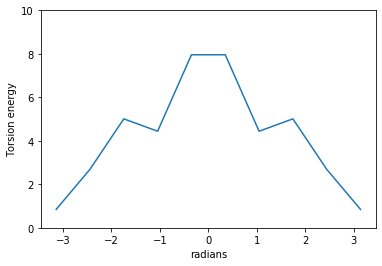

In [21]:
torsion_force = htf_0.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [27, 10, 8, 6], [18, 10, 8, 6], htf_0._topology_proposal.new_topology, np.array(htf_0.new_positions(htf_0.hybrid_positions)))

### ALA

In [22]:
for atom in htf_0._topology_proposal.old_topology.atoms():
    print(atom)

<Atom 0 (H1) of chain 0 residue 0 (ACE)>
<Atom 1 (CH3) of chain 0 residue 0 (ACE)>
<Atom 2 (H2) of chain 0 residue 0 (ACE)>
<Atom 3 (H3) of chain 0 residue 0 (ACE)>
<Atom 4 (C) of chain 0 residue 0 (ACE)>
<Atom 5 (O) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (ALA)>
<Atom 7 (H) of chain 0 residue 1 (ALA)>
<Atom 8 (CA) of chain 0 residue 1 (ALA)>
<Atom 9 (HA) of chain 0 residue 1 (ALA)>
<Atom 10 (CB) of chain 0 residue 1 (ALA)>
<Atom 11 (HB1) of chain 0 residue 1 (ALA)>
<Atom 12 (HB2) of chain 0 residue 1 (ALA)>
<Atom 13 (HB3) of chain 0 residue 1 (ALA)>
<Atom 14 (C) of chain 0 residue 1 (ALA)>
<Atom 15 (O) of chain 0 residue 1 (ALA)>
<Atom 16 (N) of chain 0 residue 2 (NME)>
<Atom 17 (H) of chain 0 residue 2 (NME)>
<Atom 18 (C) of chain 0 residue 2 (NME)>
<Atom 19 (H1) of chain 0 residue 2 (NME)>
<Atom 20 (H2) of chain 0 residue 2 (NME)>
<Atom 21 (H3) of chain 0 residue 2 (NME)>


In [23]:
htf_0.old_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21}

In [24]:
torsion_force = htf_0.hybrid_system.getForce(2)
for i in range(torsion_force.getNumTorsions()):
    print(torsion_force.getTorsionParameters(i))

[0, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[0, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[1, 4, 6, 7, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[1, 4, 6, 8, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[2, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[2, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[3, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[3, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[4, 6, 8, 10, 3, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[4, 6, 8, 10, 2, Quantity

periodicities: [3]
phase offsets: [Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.6508444444444444, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.0, 0.976266666666667, 0.9762666666666666, 0.0, 0.9762666666666666, 0.9762666666666666, 0.0, 0.9762666666666663, 0.976266666666667, 0.0]


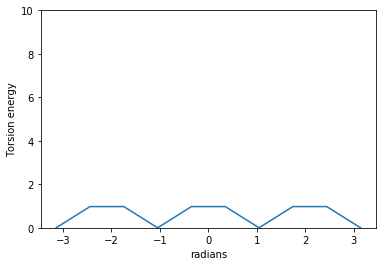

In [25]:
torsion_force = htf_0.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [11, 10, 8, 6], [11, 10, 8, 6], htf_0._topology_proposal.old_topology, np.array(htf_0.old_positions(htf_0.hybrid_positions)))

In [26]:
# Note: 6, 8, 10, 15 is not present in 

# ALA->THR lambda=1

### THR

In [27]:
htf_1.new_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 14,
 12: 15,
 20: 16,
 21: 17,
 22: 18,
 23: 19,
 24: 20,
 25: 21,
 13: 22,
 14: 23,
 15: 24,
 16: 25,
 17: 26,
 18: 27,
 19: 28}

periodicities: [4, 3, 2, 1]
phase offsets: [Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian), Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.39748, unit=kilojoule/mole), Quantity(value=1.31796, unit=kilojoule/mole), Quantity(value=0.025104, unit=kilojoule/mole), Quantity(value=2.8200160000000003, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.845168, 2.6901326546355606, 5.010746662307136, 4.4413160000000005, 7.957740683057306, 7.957740683057306, 4.441316000000001, 5.010746662307136, 2.6901326546355606, 0.845168]


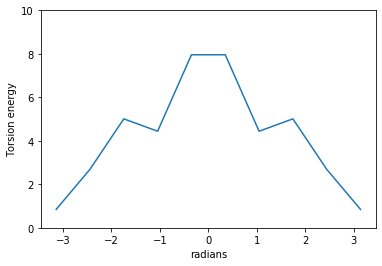

In [28]:
torsion_force = htf_1.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [27, 10, 8, 6], [18, 10, 8, 6], htf_1._topology_proposal.new_topology, np.array(htf_1.new_positions(htf_1.hybrid_positions)))

### ALA

In [29]:
htf_1.old_to_hybrid_atom_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21}

In [30]:
torsion_force = htf_1.hybrid_system.getForce(2)
for i in range(torsion_force.getNumTorsions()):
    print(torsion_force.getTorsionParameters(i))

[0, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[0, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[1, 4, 6, 7, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[1, 4, 6, 8, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
[2, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[2, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[3, 1, 4, 5, 1, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[3, 1, 4, 5, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=0.33472, unit=kilojoule/mole)]
[4, 6, 8, 10, 3, Quantity(value=0.0, unit=radian), Quantity(value=3.3472000000000004, unit=kilojoule/mole)]
[4, 6, 8, 10, 2, Quantity

periodicities: [3]
phase offsets: [Quantity(value=0.0, unit=radian)]
ks: [Quantity(value=0.6508444444444444, unit=kilojoule/mole)]
angles: [-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
energies: [0.0, 0.976266666666667, 0.9762666666666666, 0.0, 0.9762666666666666, 0.9762666666666666, 0.0, 0.9762666666666663, 0.976266666666667, 0.0]


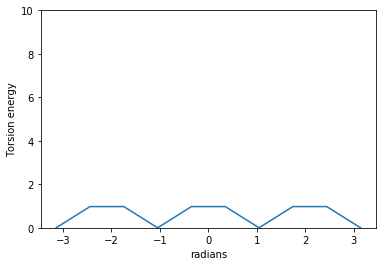

In [31]:
torsion_force = htf_1.hybrid_system.getForce(2)
plot_torsion_energy(torsion_force, [11, 10, 8, 6], [11, 10, 8, 6], htf_1._topology_proposal.old_topology, np.array(htf_1.old_positions(htf_1.hybrid_positions)))